In [1]:
%matplotlib inline

# Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

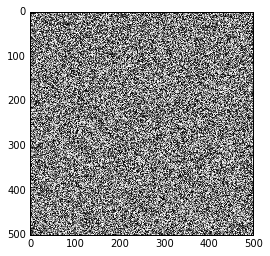

In [2]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray', interpolation='nearest');

The same holds for "real-world" images:

<class 'numpy.ndarray'> uint8 (303, 384)


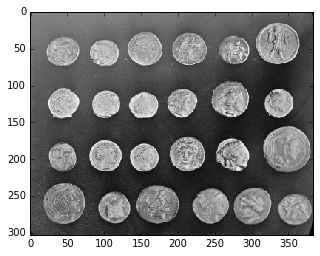

In [3]:
from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray', interpolation='nearest');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

Shape: (300, 451, 3)
Values min/max: 0 231


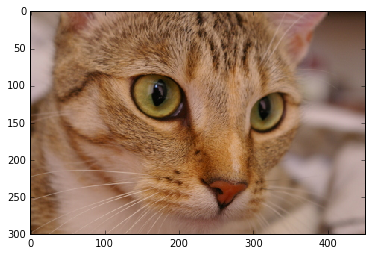

In [4]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat, interpolation='nearest');

These are *just numpy arrays*. Making a red square is easy using just array slicing and manipulation:

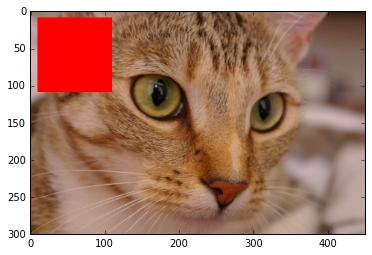

In [5]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Images can also include transparent regions by adding a 4th dimension, called an *alpha layer*.

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```


``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


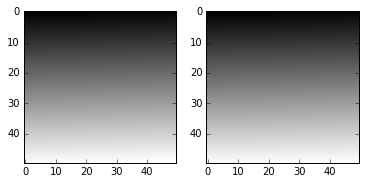

In [6]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

This is achieved through the use of a few utility functions, such as ``img_as_float`` and ``img_as_ubyte``:

In [7]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())

print("231/255 =", 231/255.)

type, min, max: float64 0.0 0.905882352941
type, min, max: uint8 0 231
231/255 = 0.9058823529411765


Your code would then typically look like this:

In [8]:
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

## Displaying images using matplotlib

Before we get started, a quick note about plotting images---specifically, plotting gray-scale images with Matplotlib. First, let's grab an example image from `scikit-image`.

In [9]:
from skimage import data

image = data.camera()

Also, we'll want to make sure we have numpy and matplotlib imported.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

If we plot a gray-scale image using the old default colormap "jet"
(it's been replaced by Viridis in Matplotlib >= 1.5), and a gray-scale
colormap, "gray", you can easily see the difference:

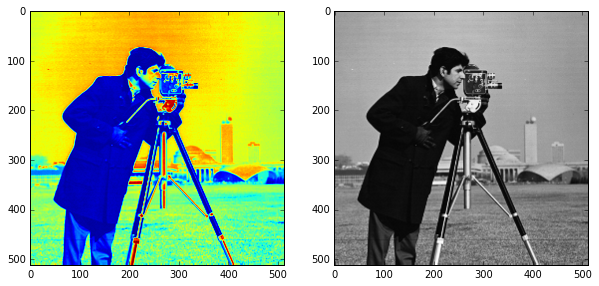

In [11]:
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10, 5))

ax_jet.imshow(image, cmap='jet')
ax_gray.imshow(image, cmap='gray');

We can get a better idea of the ill effects by zooming into the man's face.

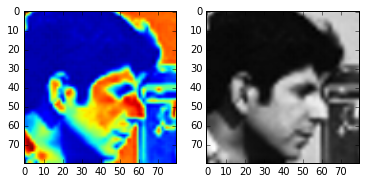

In [12]:
face = image[80:160, 200:280]
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face, cmap='jet')
ax_gray.imshow(face, cmap='gray');

Notice how the face looks distorted and splotchy with the "jet" colormap. Also, this colormap distorts the concepts of light and dark, and there are artificial boundaries created by the different color hues. Is that a beauty mark on the man's upper lip? No, it's just an artifact of this ridiculous colormap.

Here's another example:

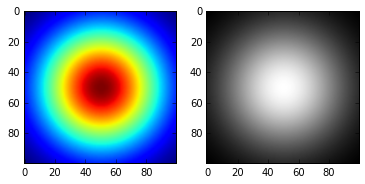

In [13]:
X, Y = np.ogrid[-5:5:0.1, -5:5:0.1]
R = np.exp(-(X**2 + Y**2) / 15)

fig, (ax_jet, ax_gray) = plt.subplots(1, 2)
ax_jet.imshow(R, cmap='jet')
ax_gray.imshow(R, cmap='gray');

Woah!  See all those non-existing contours?

You can set both the method of interpolation and colormap used
explicitly in the ``imshow`` command:

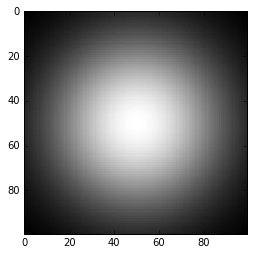

In [14]:
plt.imshow(R, cmap='gray', interpolation='nearest');

Otherwise, you can add the following setting at the top of any script
to change the default colormap:

In [15]:
plt.rcParams['image.cmap'] = 'gray'

Don't worry: color images are unaffected by this change.

In addition, we'll set the interpolation to 'nearest neighborhood' so
that it's easier to distinguish individual pixels in your image (the
default is 'bicubic'--see the exploration below).

In [16]:
plt.rcParams['image.interpolation'] = 'nearest'

For reference, let's look at the images above using Matplotlib's new 'viridis' and 'magma' colormaps (requires matplotlib >= 1.5).

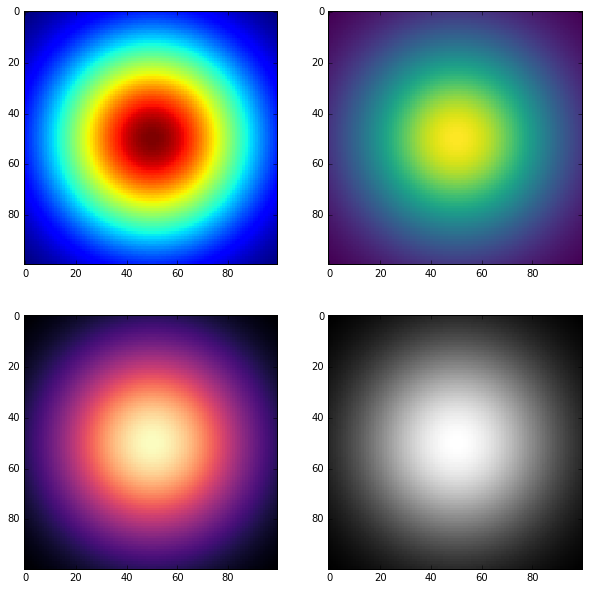

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(R, cmap='jet')
axes[0, 1].imshow(R, cmap='viridis')
axes[1, 0].imshow(R, cmap='magma')
axes[1, 1].imshow(R, cmap='gray');

### Interactive demo: interpolation and color maps

If you are viewing this tutorial from inside a Jupyter notebook, the
following code will display an interactive widget for exploring
different colormaps and types of interpolation.

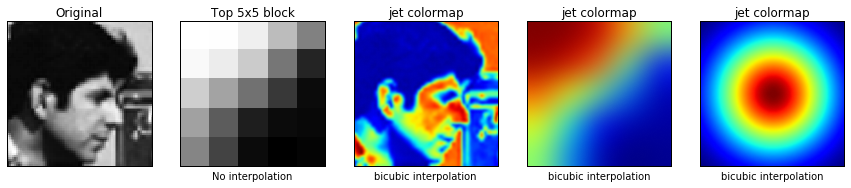

In [18]:
from IPython.html.widgets import interact, fixed
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect

@interact(image=fixed(face),
          cmap=sorted([c for c in dir(colormaps)
                       if not c.endswith('_r') and
                          isinstance(getattr(colormaps, c),
                                     matplotlib.colors.Colormap)],
                      key=lambda x: x.lower()),
          reverse_cmap=False,
          interpolation=['nearest', 'bilinear', 'bicubic',
                         'spline16', 'spline36', 'hanning', 'hamming',
                         'hermite', 'kaiser', 'quadric', 'catrom',
                         'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'])
def imshow_params(image, cmap='jet', reverse_cmap=False, interpolation='bicubic'):
    fig, axes = plt.subplots(1, 5, figsize=(15, 4))

    if reverse_cmap:
        cmap = cmap + '_r'

    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title('Original')

    axes[1].imshow(image[:5, :5], cmap='gray', interpolation='nearest')
    axes[1].set_title('Top 5x5 block')
    axes[1].set_xlabel('No interpolation')

    axes[2].imshow(image, cmap=cmap, interpolation=interpolation)
    axes[2].set_title('%s colormap' % cmap)
    axes[2].set_xlabel('%s interpolation' % interpolation)

    axes[3].imshow(image[:5, :5], cmap=cmap, interpolation=interpolation)
    axes[3].set_title('%s colormap' % cmap)
    axes[3].set_xlabel('%s interpolation' % interpolation)

    axes[4].imshow(R, cmap=cmap, interpolation=interpolation)
    axes[4].set_title('%s colormap' % cmap)
    axes[4].set_xlabel('%s interpolation' % interpolation)

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

## Image I/O

Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include matplotlib, pillow, imageio, imread, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whatever option is available:

<class 'numpy.ndarray'>


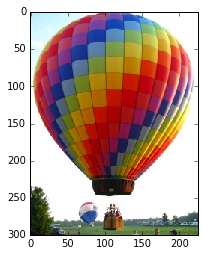

In [19]:
from skimage import io

image = io.imread('../../images/balloon.jpg')

print(type(image))
plt.imshow(image);

We also have the ability to load multiple images, or multi-layer TIFF images:

In [20]:
ic = io.imread_collection('../../images/*.png')

print(type(ic), '\n\n', ic)

<class 'skimage.io.collection.ImageCollection'> 

 ['../../images/chapel_floor.png', '../../images/clock_motion.png', '../../images/fingers.png', '../../images/snakes.png', '../../images/zebrafish-spinal-cord-color.png', '../../images/zebrafish-spinal-cord.png']


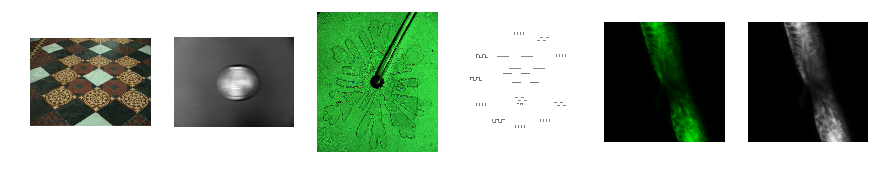

In [21]:
f, axes = plt.subplots(nrows=1, ncols=len(ic), figsize=(15, 10))

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

## Exercises

### Draw the letter H

Define a function that takes as input an RGB image and a pair of coordinates (row, column), and returns the image (optionally a copy) with green letter H overlaid at those coordinates. The coordinates should point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

In [22]:
def draw_H(image, coords, color=(0.8, 0.8, 0.8), in_place=True):
    out = image.copy()
    # your code goes here
    return out

Test your function like so:

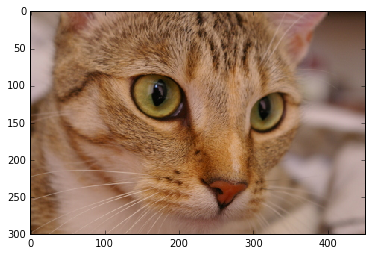

In [23]:
cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H);

### RGB intensity plot

Plot the intensity of each channel of the image along a given row.
Start with the following template:

```
def plot_intensity(image, row):
    # Fill in the three lines below
    red_values = ...
    green_values = ...
    blue_values = ...

    plt.figure()
    plt.plot(red_values, 'r')
    plt.plot(green_values, 'g')
    plt.plot(blue_values, 'b')

    pass
```


Test your function using:

```
plot_intensity(cat, 50)
plot_intensity(cat, 100)
```
